### Import python modules required for decision tree demo

---



In [ ]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

### Import week-3 lecture data for demonstration

In [ ]:
data_set = pd.read_csv("https://raw.githubusercontent.com/gwuml/datasets/main/classification/dt_class_example.csv")
data_set

,Gender,Car Ownership,Travel Cost,Income Level,class
0,Male,0,Cheap,Low,Bus
1,Male,1,Cheap,Medium,Bus
2,Female,1,Cheap,Medium,Train
3,Female,0,Cheap,Low,Bus
4,Male,1,Cheap,Medium,Bus
5,Male,0,Standard,Medium,Train
6,Female,1,Standard,Medium,Train
7,Female,1,Expensive,High,Car
8,Male,2,Expensive,Medium,Car
9,Female,2,Expensive,High,Car


### Transform categorical to numeric data for ML processing

In [ ]:
targets = data_set["class"].unique()
cols = data_set.columns

**Normalization vs Standardization**

**What is Normalization?** Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. Here’s the formula for normalization:

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Norm_eq.gif"></center>


**What is Standardization?**
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Here’s the formula for standardization:

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif"></center>

***So, what do we use?***

**Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

**Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

*(Source: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)*

**What is ordinal encoding?**

An ordinal encoding involves mapping each unique label to an integer value. This type of encoding is really only appropriate if there is a known relationship between the categories. 


In [ ]:
enc = OrdinalEncoder()
enc.fit(data_set)
data_set = pd.DataFrame(enc.transform(data_set))
data_set.columns = cols
data_set

,Gender,Car Ownership,Travel Cost,Income Level,class
0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,2.0,0.0
2,0.0,1.0,0.0,2.0,2.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,2.0,0.0
5,1.0,0.0,2.0,2.0,2.0
6,0.0,1.0,2.0,2.0,2.0
7,0.0,1.0,1.0,0.0,1.0
8,1.0,2.0,1.0,2.0,1.0
9,0.0,2.0,1.0,0.0,1.0


In [ ]:
X = data_set.drop(["class"], axis=1)
y = data_set["class"]

**What is hyperparameter?**

A hyperparameter is a parameter that is set before the learning process begins. These parameters are tunable and can directly affect how well a model trains. Some examples of hyperparameters in machine learning: Learning Rate. Number of Epochs.

*(Source: https://deepai.org/machine-learning-glossary-and-terms/hyperparameter)*


### Run various models with different hyperparameters

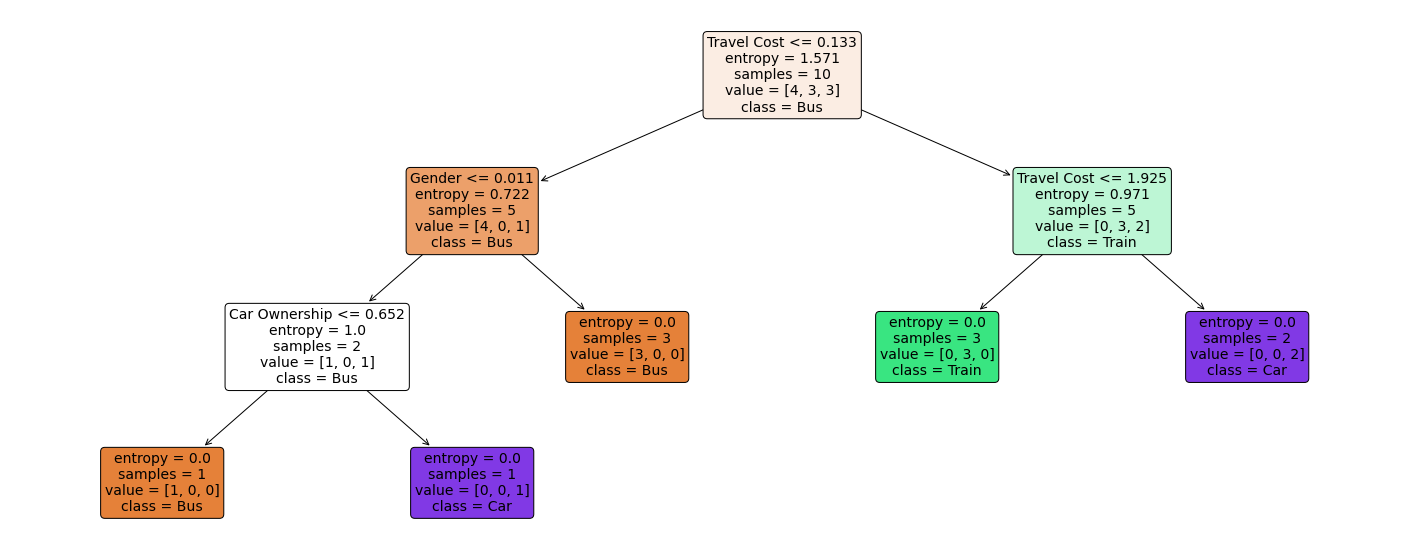

In [ ]:
# Set Hyperparameters
criterion = 'entropy' # gini, entropy
max_depth = 3
splitter = 'random'

# train the model
clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, splitter=splitter)
clf.fit(X, y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=targets, 
              filled=True, 
              rounded=True, 
              fontsize=14)


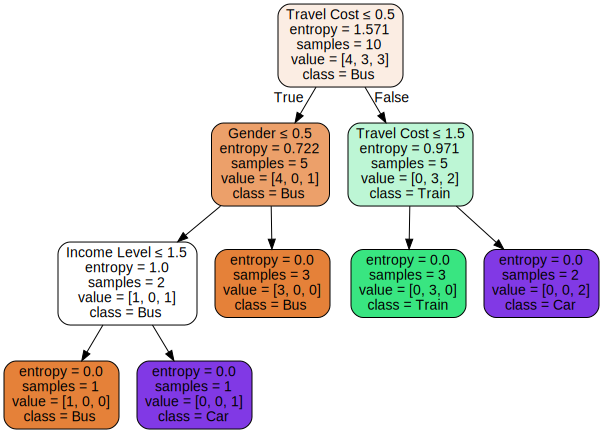

In [ ]:
import graphviz 
from sklearn import tree

# Set Hyperparameters
criterion = 'entropy' # gini, entropy
max_depth = 3
splitter = 'best'

# train the model
clf = DecisionTreeClassifier(criterion=criterion, 
                max_depth=max_depth, splitter=splitter)

clf.fit(X, y)


dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("dt") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=cols[:-1],  
                     class_names=targets,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

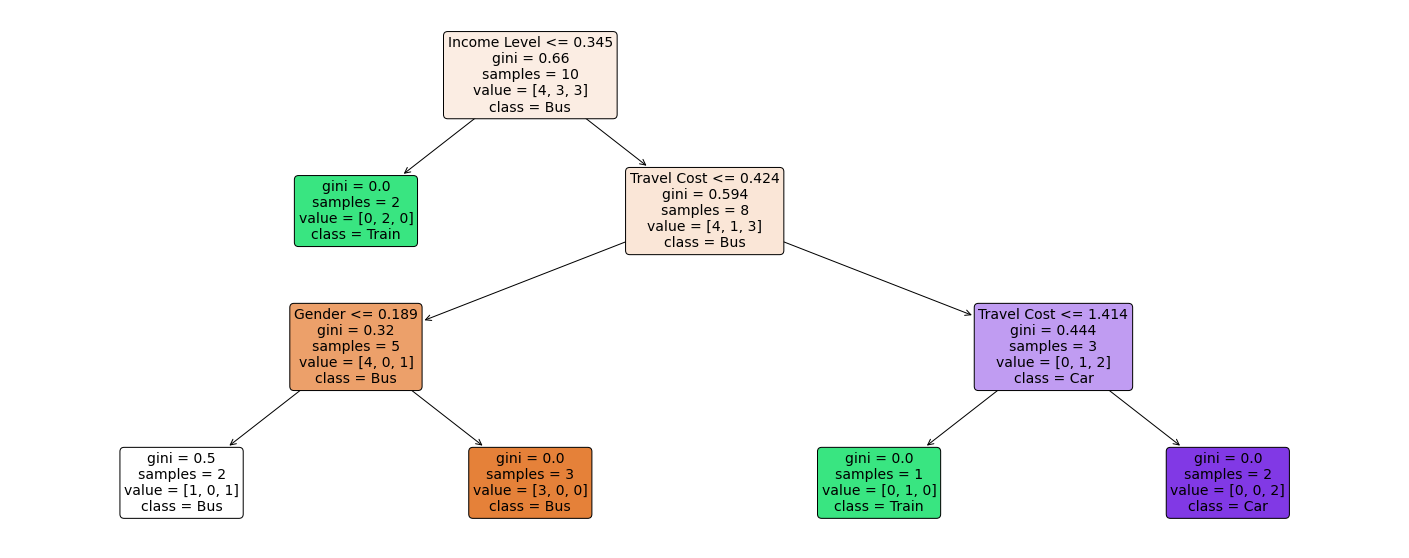

In [ ]:
# Set Hyperparameters
criterion = 'gini' # gini, entropy
max_depth = 3
splitter = 'random'

clf = DecisionTreeClassifier(criterion=criterion, 
                max_depth=max_depth, splitter=splitter)

clf.fit(X, y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=targets,  
              filled=True, 
              rounded=True, 
              fontsize=14)



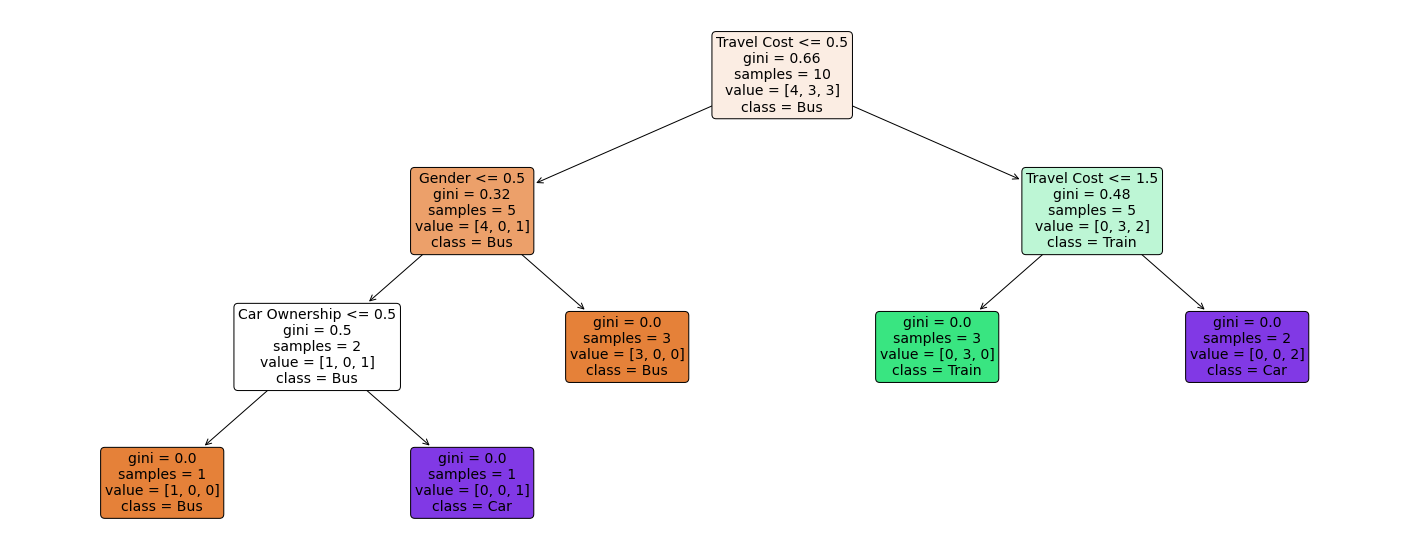

In [ ]:
# Set Hyperparameters
criterion = 'gini' # gini, entropy
max_depth = 3
splitter = 'best'

clf = DecisionTreeClassifier(criterion=criterion, 
                max_depth=max_depth, splitter=splitter)

clf.fit(X, y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=targets, 
              filled=True, 
              rounded=True, 
              fontsize=14)



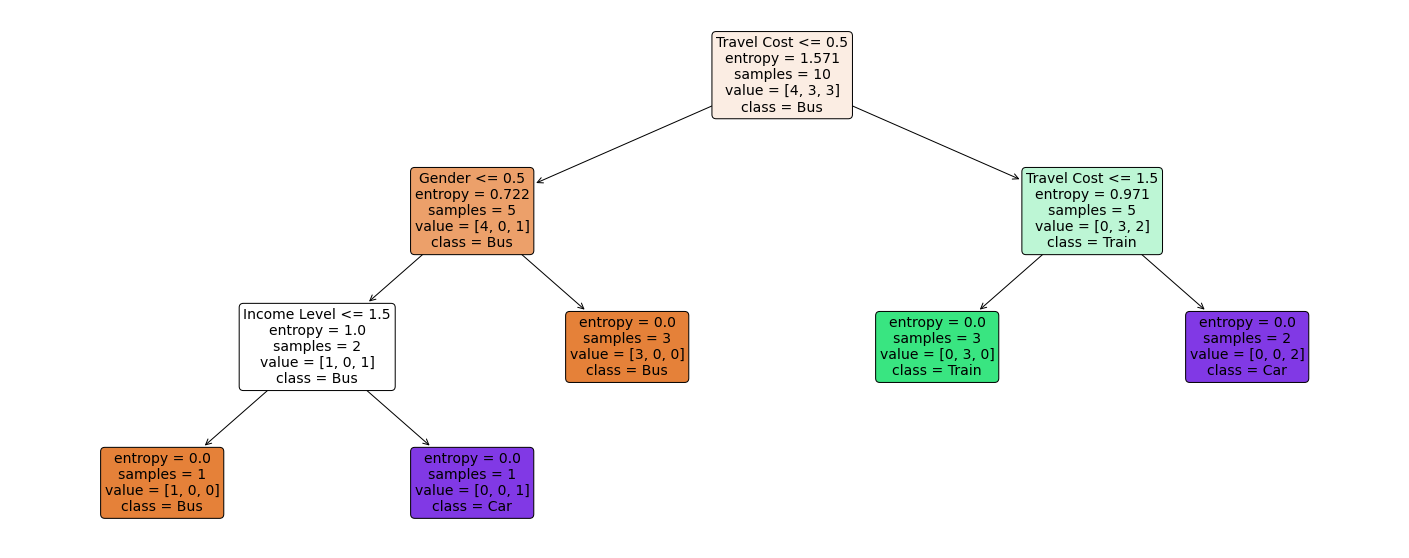

In [ ]:
# Set Hyperparameters
criterion = 'entropy' # gini, entropy
max_depth = 5
splitter = 'best'

clf = DecisionTreeClassifier(criterion=criterion, 
                max_depth=max_depth, splitter=splitter)

clf.fit(X, y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=targets, 
              filled=True, 
              rounded=True, 
              fontsize=14)

